# importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10580\2259254143.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Loading the Dataset

In [4]:
glass=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',names=[' Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'])

In [5]:
glass.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
# finding out the datatypes of the attributes.
glass.dtypes

 Id number         int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [7]:
# description of each of the attributes of the dataset.
glass.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
glass['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

# 2. Exploratory Data Analysis (EDA) and Visualization:

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


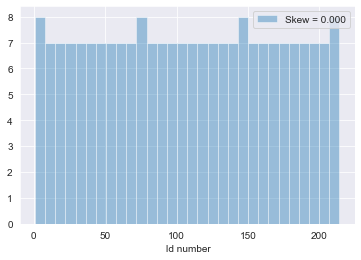

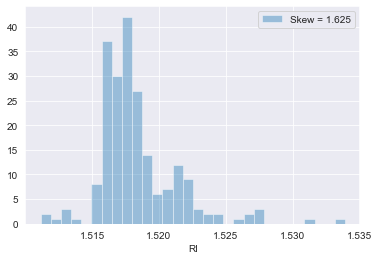

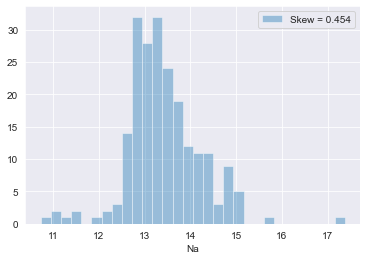

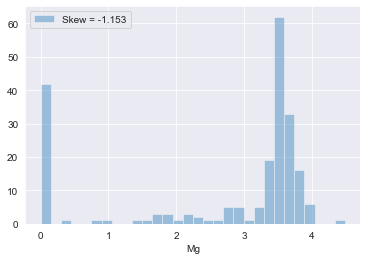

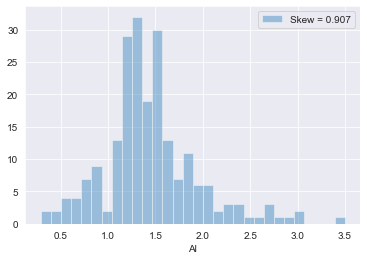

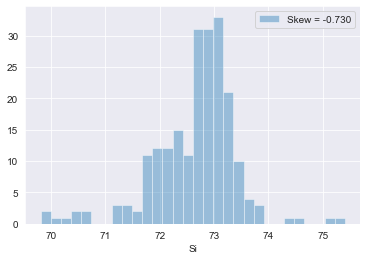

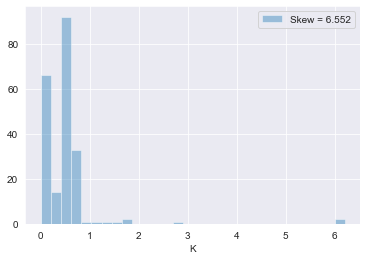

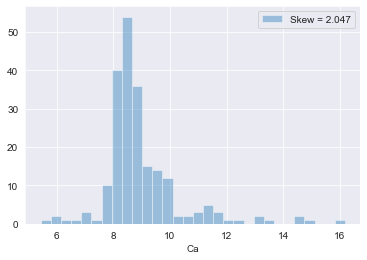

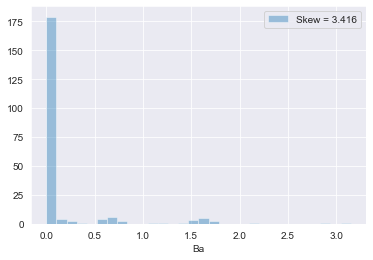

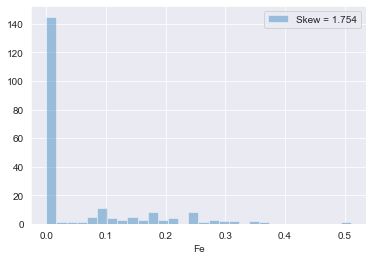

In [9]:
# Plotting and visualizing different attributes of the dataset using different plots.

features = glass.columns[:-1].tolist()
for feat in features:
    skew = glass[feat].skew()
    sns.distplot(glass[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

# Finding out the number of observations and outliers in the datase

In [10]:
def outlier_hunt(glass):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in glass.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(glass[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(glass[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = glass[(glass[col] < Q1 - outlier_step) | (glass[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The glass contains %d observations with more than 2 outliers' %(len(outlier_hunt(glass[features])))) 

The glass contains 14 observations with more than 2 outliers


<Figure size 720x720 with 0 Axes>

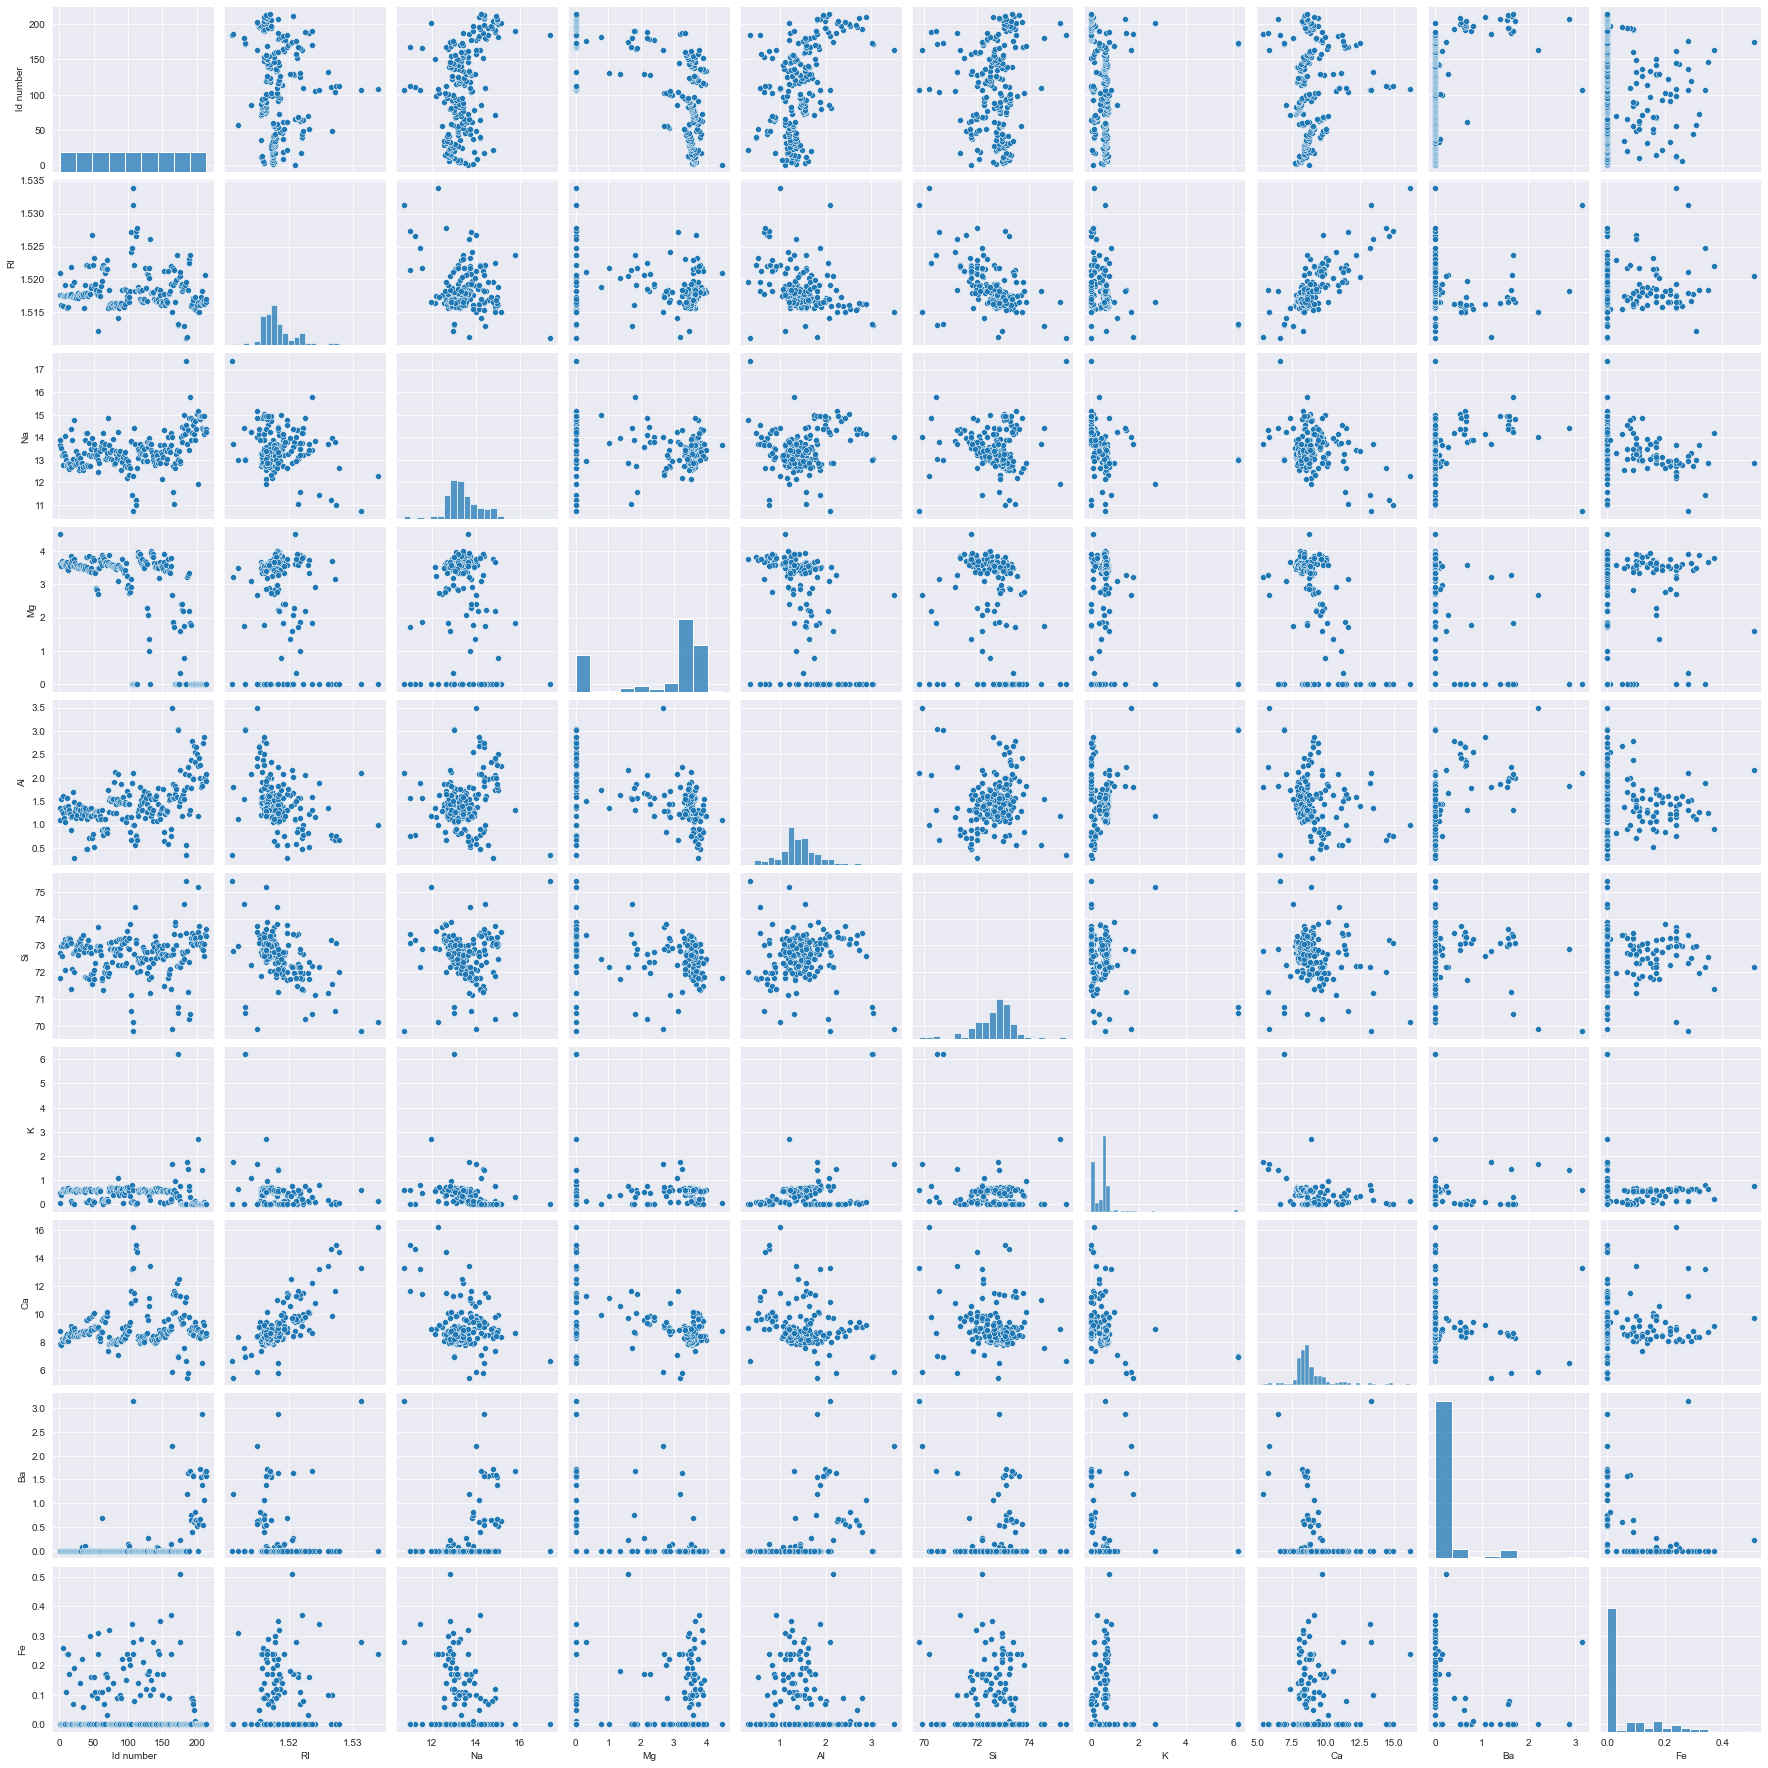

In [11]:
# plotting different features in the pairplot category
plt.figure(figsize=(10,10))
sns.pairplot(glass[features],palette='coolwarm')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


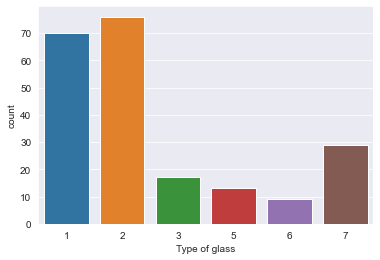

In [12]:
# showcasing the count plot which will count the Type of glass of the attributes.
sns.countplot(glass['Type of glass'])
plt.show()

<AxesSubplot:>

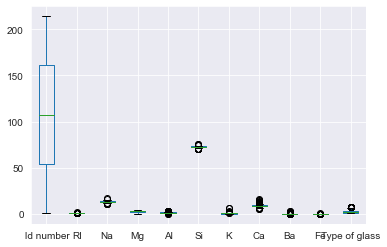

In [13]:
glass.boxplot()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Type of glass', ylabel='Density'>

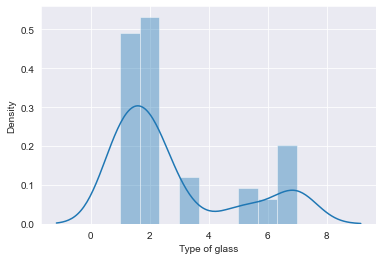

In [96]:
sns.distplot(glass['Type of glass'])

# 3. Model Creation

The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups.

Here after visualizing the dataset I have decided to go with these models -

# Logistic Regression : Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [14]:
X = glass.drop('Type of glass', axis = 1).values
y = glass['Type of glass'].values.reshape(-1,1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [16]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (160, 10)
Shape of X_test:  (54, 10)
Shape of y_train:  (160, 1)
Shape of y_test (54, 1)


Importing required libraries for the Model creation.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from time import time
from sklearn.metrics import f1_score
from os import path, makedirs, walk
from joblib import dump, load
import json
from sklearn import metrics

# Finding out the Correlation of the attributes.

In [18]:
pd.DataFrame (glass.corr().round(2))

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id number,1.00,-0.07,0.38,-0.65,0.49,0.06,0.00,0.09,0.45,-0.07,0.88
RI,-0.07,1.00,-0.19,-0.12,-0.41,-0.54,-0.29,0.81,-0.00,0.14,-0.16
Na,0.38,-0.19,1.00,-0.27,0.16,-0.07,-0.27,-0.28,0.33,-0.24,0.50
Mg,-0.65,-0.12,-0.27,1.00,-0.48,-0.17,0.01,-0.44,-0.49,0.08,-0.74
Al,0.49,-0.41,0.16,-0.48,1.00,-0.01,0.33,-0.26,0.48,-0.07,0.60
Si,0.06,-0.54,-0.07,-0.17,-0.01,1.00,-0.19,-0.21,-0.10,-0.09,0.15
K,0.00,-0.29,-0.27,0.01,0.33,-0.19,1.00,-0.32,-0.04,-0.01,-0.01
Ca,0.09,0.81,-0.28,-0.44,-0.26,-0.21,-0.32,1.00,-0.11,0.12,0.00
Ba,0.45,-0.00,0.33,-0.49,0.48,-0.10,-0.04,-0.11,1.00,-0.06,0.58
Fe,-0.07,0.14,-0.24,0.08,-0.07,-0.09,-0.01,0.12,-0.06,1.00,-0.19


# A. Logistic Regression

In [19]:
logReg = LogisticRegression(max_iter = 5000)

In [20]:
logReg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=5000)

In [21]:
logReg.score(X_train, y_train)

1.0

In [22]:
logReg.score(X_test, y_test)

1.0

In [23]:
y_pred_dt_test = logReg.predict(X_test)

In [24]:
print('Accuracy of Logistic Regression Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Logistic Regression Model: 1.0


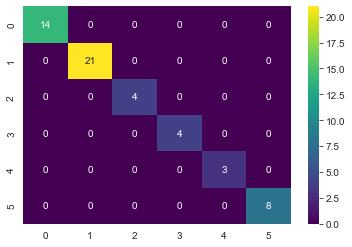

In [25]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

#    B. Decision Tree Classifier Algorithm

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [26]:
dtc = DecisionTreeClassifier()

In [27]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
dtc.score(X_train, y_train)

1.0

In [29]:
dtc.score(X_test, y_test)

0.9814814814814815

In [30]:
dtce = DecisionTreeClassifier(criterion = 'entropy')

In [31]:
dtce.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [32]:
dtce.score(X_train, y_train)

1.0

In [33]:
dtce.score(X_test, y_test)

0.9814814814814815

In [34]:
y_pred_dt_test = dtc.predict(X_test)

In [35]:
print('Accuracy of Decision Tree Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Decision Tree Classifier Model: 0.9814814814814815


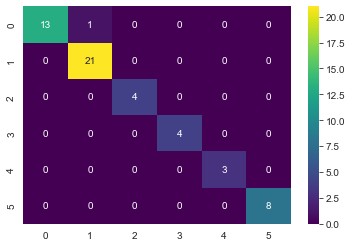

In [36]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()


# C. Random Forest Classifier Algorithm

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the mode

In [37]:
rfc = RandomForestClassifier()

In [38]:
rfc.fit(X_train, y_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10580\1542427849.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier()

In [39]:
rfc.score(X_train, y_train)

1.0

In [40]:
rfc.score(X_test, y_test)

1.0

In [41]:
y_pred_dt_test = rfc.predict(X_test)

In [42]:
print('Accuracy of Random Forest Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Random Forest Classifier Model: 1.0


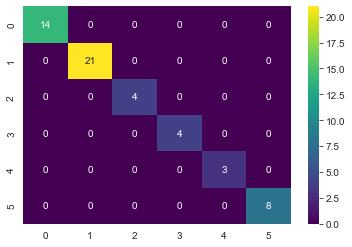

In [43]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

# D. K-Nearest Neighbours Algorithm

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [44]:
from sklearn.neighbors import KNeighborsClassifier 

In [45]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )

In [46]:
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [47]:
classifier.score(X_train, y_train)

0.9875

In [48]:
classifier.score(X_test, y_test)

0.9629629629629629

In [49]:
y_pred_dt_test = classifier.predict(X_test)

In [50]:
print('Accuracy of KNN Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of KNN Classifier Model: 0.9629629629629629


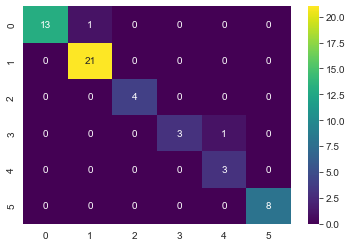

In [51]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

# E. Gausian NB Algorithm

This method is expected to be called several times consecutively on different chunks of a dataset so as to implement out-of-core or online learning. This is especially useful when the whole dataset is too big to fit in memory at once. This method has some performance and numerical stability overhead, hence it is better to call partial_fit on chunks of data that are as large as possible (as long as fitting in the memory budget) to hide the overhead

In [52]:
gnb = GaussianNB()

In [53]:
gnb.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [54]:
gnb.score(X_train, y_train)

0.85625

In [55]:
gnb.score(X_test, y_test)

0.7777777777777778

In [56]:
y_pred_dt_test = gnb.predict(X_test)

In [57]:
print('Accuracy of Gaussian Naive Bayes Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Gaussian Naive Bayes Classifier Model: 0.7777777777777778


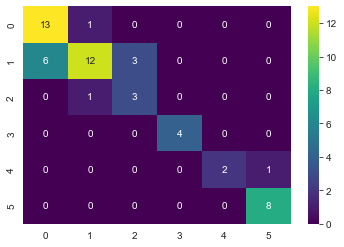

In [58]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

# F. Support Vector Machine Algorithm

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

In [59]:
classifier_svm = SVC()

In [60]:
classifier_svm.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [61]:
classifier_svm.score(X_train, y_train)

0.825

In [62]:
classifier_svm.score(X_test, y_test)

0.7962962962962963

In [63]:
y_pred_dt_test = classifier_svm.predict(X_test)

In [64]:
print('Accuracy of Support Vector Machine Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Support Vector Machine Model: 0.7962962962962963


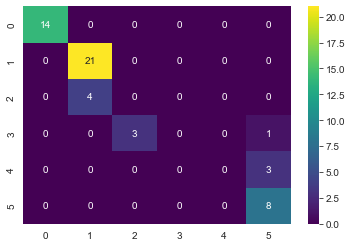

In [65]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

# G. Gradient Boosting Classifier

Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [66]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [67]:
gfc=GradientBoostingClassifier(n_estimators= 1000, max_leaf_nodes= 4, max_depth=None,random_state= 2,min_samples_split= 5)
gfc.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=None, max_leaf_nodes=4,
                           min_samples_split=5, n_estimators=1000,
                           random_state=2)

In [68]:
gfc.score(X_train, y_train)

1.0

In [69]:
gfc.score(X_test, y_test)

0.9814814814814815

In [70]:
y_pred_dt_test = gfc.predict(X_test)

In [71]:
print('Accuracy of Gradient Boosting Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Gradient Boosting Classifier Model: 0.9814814814814815


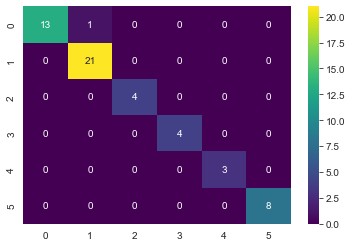

In [72]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

# H.AdaBoost Classifier

AdaBoost, short for Adaptive Boosting, is a statistical classification meta-algorithm formulated by Yoav Freund and Robert Schapire, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many other types of learning algorithms to improve performance.

In [73]:
abc=AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=100, random_state=0)

In [74]:
abc.score(X_train, y_train)

0.825

In [75]:
abc.score(X_test, y_test)

0.7777777777777778

In [76]:
y_pred_dt_test = abc.predict(X_test)

In [77]:
print('Accuracy of AdaBoost Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of AdaBoost Classifier Model: 0.7777777777777778


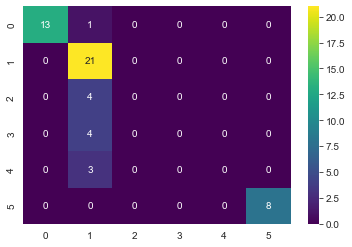

In [78]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

# l.Stochastic Gradient Descent Classifier


Stochastic Gradient Descent (SGD) is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of functions that minimize a cost function. In other words, it is used for discriminative learning of linear classifiers under convex loss functions such as SVM and Logistic regression.

In [79]:
from sklearn.linear_model import SGDClassifier

In [80]:
SGDClf = SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet")


In [81]:
SGDClf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(penalty='elasticnet')

In [82]:
SGDClf.score(X_train, y_train)

0.45

In [83]:
SGDClf.score(X_test, y_test)

0.3148148148148148

In [84]:
y_pred_dt_test = SGDClf.predict(X_test)

In [85]:
print('Accuracy of Stochastic Gradient Descent Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Stochastic Gradient Descent Classifier Model: 0.3148148148148148


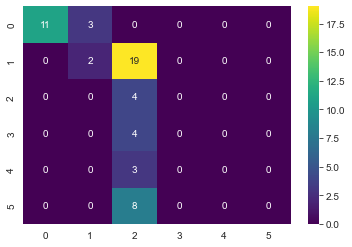

In [86]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

# j.MLP Classifier


MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification

In [87]:
mlp=MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=1, max_iter=1000)

In [88]:
mlp.score(X_train, y_train)

1.0

In [89]:
mlp.score(X_test, y_test)

1.0

In [90]:
y_pred_dt_test = mlp.predict(X_test)

In [91]:
print('Accuracy of MLP Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of MLP Classifier Model: 1.0


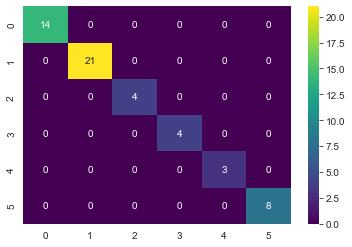

In [92]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

# Creating the model using Gradient Boosting Classifier

# 

In [93]:
import pickle

In [94]:
filename = 'final_glass_prediction_model.pkl'
pickle.dump(gfc, open(filename, 'wb'))

In [95]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9814814814814815
